# Programación probabilística 

La programación probabilística (PP) es un nuevo paradigma que busca combinar los lenguajes de programación de propósito general con el modelamiento probabilístico.

El objetivo es hacer estadística y en particular inferencia Bayesiana usando las herramientas de ciencias de la computación. Como muestra el siguiente diagrama la PP corre en dos direcciones:

<a href="https://arxiv.org/abs/1809.10756"><img src="images/PP.png" width="500"></a>

El lenguaje Python tiene un ecosistema rico en frameworks y librerías de PP:

- [PyMC3](https://docs.pymc.io/notebooks/getting_started.html)
- [PyStan](https://pystan.readthedocs.io/en/latest/)
- [emcee](http://dfm.io/emcee/current/)
- [Edward](http://edwardlib.org/)
- [Pyro](http://pyro.ai) y [NumPyro](http://num.pyro.ai/en/latest/index.html)


En este tutorial aprenderemos a usar la librería `NumPyro` para:

1. Definir un modelo bayesiano en base a una verosimilitud y a un prior
1. Aplicar distintos algoritmos de MCMC sobre el modelo
1. Verificar la convergencia y analizar los posteriors

A grandes rasgos `NumPyro` opera como una especie de interfaz entre la librería NumPy de computo numérico y el backed `pyro` de programación probabilística. Entre sus ventajas se encuentra el uso de [JAX](https://github.com/google/jax) para hacer compilación *just in time* en CPU/GPU, lo cual la hace muy eficiente.


Como ejemplo para aprender a usar esta librería utilizaremos un modelo de **regresión lineal Bayesiana**.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
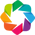

Numpyro version: 0.10.1


In [1]:
import numpy as np
from jax import random
from jax import numpy as jnp
import numpyro
import numpyro.distributions as dists
import holoviews as hv

hv.extension('bokeh')
hv.opts.defaults(hv.opts.Curve(width=500), 
                 hv.opts.Scatter(width=500, size=10), 
                 hv.opts.HLine(alpha=0.5, color='k', line_dash='dashed'), 
                 hv.opts.VLine(alpha=0.5, color='k', line_dash='dashed'))
numpyro.set_host_device_count(2)
print(f"Numpyro version: {numpyro.__version__}")

## Formulación bayesiana de la regresión lineal

Consideramos que tenemos $N$ tuplas $(x_i, y_i)$ donde $X$ es la variable independiente e $Y$ la dependiente.

En una regresión queremos estimar $\mathbb{E}[Y|X]$ en base a un modelo paramétrico $Y = f_\theta(X)$. En este caso asumiremos un modelo lineal:

$$
y_i = w x_i + b + \epsilon \quad i=1,2,\ldots,N
$$

donde queremos aprender los parámetros $\theta=(w, b)$ bajo el supuesto de que $p(\epsilon) = \mathcal{N}(0, \sigma_\epsilon^2)$, luego 

$$
y \sim  \mathcal{N}(b + w x, \sigma_\epsilon^2)
$$

y por lo tanto la verosimilitud sería:

$$
p(y|x,w,b,\sigma)  = \prod_{i=1}^N \mathcal{N}(b + w x_i, \sigma_\epsilon^2)
$$

A diferencia de una regresión "convencional" asumiremos que $w$, $b$ y $\sigma_\epsilon$ no son variables determinísticas sino **aleatorias** y por ende **tienen distribuciones**. Llamamos *prior* a la distribución de los parámetros previo a observar nuestros datos. 

En este caso particular asumiremos una distribución normal para los priors de $w$ y $b$:

$$
p(b) = \mathcal{N}(\mu_b, \sigma_b^2)
$$

$$
p(w) = \mathcal{N}(\mu_w, \sigma_w^2)
$$

Lo que buscamos es el posterior de los parámetros $\theta$, es decir su distribución condicionado a nuestras observaciones $D$ que se obtiene con el teorema de Bayes como:

$$
p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)}
$$

y que en este caso particular es:

$$
p(w, b, \sigma_\epsilon|D) = \frac{p(D|w, b, \sigma_\epsilon) p(w) p(b) p(\sigma_\epsilon)}{\int p(D|w, b, \sigma_\epsilon) p(w) p(b) p(\sigma_\epsilon) \, dw \, db \, d\sigma_\epsilon}
$$

donde por simplicidad se asume que $p(w,b,\sigma_\epsilon) = p(w)p(b)p(\sigma_\epsilon)$, es decir que el prior no tiene correlaciones entre los parámetros.

:::{important}

Estimaremos este posterior en base a muestras utilizando MCMC.

:::


A continuación se generan los datos que utilizaremos a lo largo de este tutorial 

In [2]:
np.random.seed(1234)

b_star, w_star, s_eps_star, N = 10, 2.5, 1., 10
x = np.random.randn(N)
y = b_star + w_star*x +  np.random.randn(N)*s_eps_star

x_test = np.linspace(-3, 3, 100)

In [3]:
hv.Scatter((x, y)).opts(color='k')

:Scatter   [x]   (y)

## Especificación del modelo generativo 

El modelo generativo es aquel que "produjo" los datos. Usualmente comienza con los hiperparámetros, continua en las variables latentes (priors) y termina en las variables observadas (verosimilitud). A continuación se muestra el diagrama de placas de la regresión lineal bayesiana con todas sus variables, parámetros e hiperparámetros:

<img src="images/plate_linregress.png" width="600">


En `NumPyro` un modelo generativo es simplemente una función que define y relaciona las variables determinísticas y aleatorias que utilizaremos. Para crear una variable aleatoria se utiliza la primitiva:

```python
numpyro.sample(name, # El nombre de la variable (string)
               fn, # La distribución de la variable
               obs, # (Opcional) Los datos observados asociados a esta variable
               rng_key, # Una semilla aleatoria
               ...
              )
```

Los priors son variables aleatorias que no usan el argumento `obs`. En cambio, para escribir la verosimilitud, utilizamos el argumento `obs` para proporcionar los datos. Las distribuciones conocidas se pueden importar desde `numpyro.distributions`. 

Para definir una variable determínistica se utiliza la primitiva:

```python
numpyro.deterministic(name, # El nombre de la variable (string)
                      value, # Transformación sobre otras variables del modelo
                      )
```

A continuación se muestra la implementación del modelo de regresión lineal en `pyro`. Utilizaremos:

- una distribución normal con $\mu_w = \mu_b = 0$ y $\sigma_w = \sigma_b = 5.0$ para $w$ y $b$. 
- una distribución "Media"-Cauchy con $\gamma = 5.0$ para $\sigma_\epsilon$.
- Una verosimiliud normal.

In [4]:
def model(x, y=None):
    prior_dist = dists.Normal(loc=jnp.zeros(2), scale=5*jnp.ones(2))
    theta = numpyro.sample("theta", prior_dist.to_event(1))
    s_eps = numpyro.sample("s", dists.HalfCauchy(scale=5.0))
    with numpyro.plate('datos', size=len(x)):
        f = numpyro.deterministic('f', value=x*theta[1] + theta[0])
        numpyro.sample("y", dists.Normal(loc=f, scale=s_eps), obs=y)
        return f

Durante la definición del modelo también utilizamos la primitiva

```python
numpyro.plate(name, # El nombre del contexto (string)
              size=None, # El tamaño del dataset (int)
              subsample_size=None, # El tamaño del minibatch (opcional)
              ...
             )
```
para crear una variable `y` que está condicionada al conjunto de variables `x`. Internamente `numpyro.plate` también se hace cargo de paralelizar operaciones.

Si quisieramos utilizar el modelo generativo, es decir evaluarlo, debemos proporcionar una semilla aleatoria. Podemos hacer esto con `numpyro.handlers.seed` como se muestra a continuación

In [5]:
for i in range(3): # Tres semillas
    seeded_model = numpyro.handlers.seed(model, random.PRNGKey(i))
    print(i, seeded_model(x))

0 [-0.27633387  4.1023145  -2.8082418   1.7888845   2.8633554  -1.3713253
 -1.2986963   2.6419346   0.9240432   6.8724265 ]
1 [-4.6081133 -2.5978503 -5.7705274 -3.6599596 -3.1666636 -5.1108303
 -5.077486  -3.2683191 -4.0570135 -1.3260756]
2 [-1.6500422   0.9005755  -3.1249104  -0.4470265   0.17886627 -2.2878885
 -2.2455812   0.04988593 -0.95080745  2.5142007 ]


Con `seeded_model` podemos inspeccionar la especificación del modelo con `numpyro.handlers.trace` como se muestra a continuación. También podemos obtener un diagrama de placas con `numpyro.render_model`.

In [6]:
exec_trace = numpyro.handlers.trace(seeded_model).get_trace(x)
print(numpyro.util.format_shapes(exec_trace))
#numpyro.render_model(model, (x, y)) # Requiere instalar graphviz

Trace Shapes:       
 Param Sites:       
Sample Sites:       
   theta dist    | 2
        value    | 2
       s dist    |  
        value    |  
  datos plate 10 |  
       y dist 10 |  
        value 10 |  


Una forma más completa para obtener las muestras generadas por el modelo es utilizando:

```python
numpyro.infer.Predictive(model, # El modelo que definimos anteriormente
                         num_samples=None, # El número de muestras que deseamos generar
                         return_sites=(), # Las variables de las cuales deseamos muestrear
                         posterior_samples=None, # Opcional: Lo veremos más adelante
                         ...
                        )
```

lo cual crea un objeto que podemos utilizar para evaluar nuestro modelo y recuperar las muestras de todas sus variables aleatorias y determinísticas. Más adelante veremos como utilizar este objeto para obtener muestras del posterior de nuestro modelo.


In [7]:
# Creamos el objetivo Predictive
predictive = numpyro.infer.Predictive(model, 
                                      num_samples=2000)

# Para muestrear el objeto predictive requiere una semilla aleatoria y las variables de entrada del modelo
rng_key = random.PRNGKey(12345)
rng_key, rng_key_ = random.split(rng_key)
prior_samples = predictive(rng_key_, x_test)
prior_samples.keys()

dict_keys(['f', 's', 'theta', 'y'])

En base a las muestras podemos construir histogramas o gráficos de densidad como se muestra a continuación. 

In [8]:
joint = hv.Bivariate((prior_samples['theta'][:, 1], prior_samples['theta'][:, 0]), 
                     kdims=['w', 'b']).opts(cmap='Blues', line_width=0, filled=True)

wmarginal, bmarginal = ((hv.Distribution(joint, kdims=[dim])) for dim in 'wb')
(joint) << bmarginal.opts(width=125) << wmarginal.opts(height=125)

:AdjointLayout
   :Bivariate   [w,b]   (Density)
   :Distribution   [b]   (Density)
   :Distribution   [w]   (Density)

La distribuciones estimadas a partir de las muestras son consistentes con los priors que escogimos.

Adicionalmente podemos estudiar el espacio de posibles modelos:

In [9]:
p5, p50, p95 = np.quantile(prior_samples['f'], (0.05, 0.5, 0.95), axis=0)

In [10]:
data = hv.Scatter((x, y), label='datos').opts(color='k')
p = []
for curve in prior_samples['f'][:100, :]:
    p.append(hv.Curve((x_test, curve)).opts(color='#30a2da', alpha=0.1))

line = hv.Curve((x_test, p50), label='mediana')
shade = hv.Spread((x_test, p50, p95-p5), label='95% CI').opts(color='#30a2da', alpha=0.5)

hv.Layout([hv.Overlay(p) * data, 
           hv.Overlay([line, shade, data]).opts(legend_position='bottom_right')]).opts(hv.opts.Curve(width=350))

:Layout
   .Overlay.I  :Overlay
      .Curve.I        :Curve   [x]   (y)
      .Curve.II       :Curve   [x]   (y)
      .Curve.III      :Curve   [x]   (y)
      .Curve.IV       :Curve   [x]   (y)
      .Curve.V        :Curve   [x]   (y)
      .Curve.VI       :Curve   [x]   (y)
      .Curve.VII      :Curve   [x]   (y)
      .Curve.VIII     :Curve   [x]   (y)
      .Curve.IX       :Curve   [x]   (y)
      .Curve.X        :Curve   [x]   (y)
      .Curve.XI       :Curve   [x]   (y)
      .Curve.XII      :Curve   [x]   (y)
      .Curve.XIII     :Curve   [x]   (y)
      .Curve.XIV      :Curve   [x]   (y)
      .Curve.XV       :Curve   [x]   (y)
      .Curve.XVI      :Curve   [x]   (y)
      .Curve.XVII     :Curve   [x]   (y)
      .Curve.XVIII    :Curve   [x]   (y)
      .Curve.XIX      :Curve   [x]   (y)
      .Curve.XX       :Curve   [x]   (y)
      .Curve.XXI      :Curve   [x]   (y)
      .Curve.XXII     :Curve   [x]   (y)
      .Curve.XXIII    :Curve   [x]   (y)
      .Curve.XXIV     :Curve   [x]   (y)
      .Curve.XXV      :Curve   [x]   (y)
      .Curve.XXVI     :Curve   [x]   (y)
      .Curve.XXVII    :Curve   [x]   (y)
      .Curve.XXVIII   :Curve   [x]   (y)
      .Curve.XXIX     :Curve   [x]   (y)
      .Curve.XXX      :Curve   [x]   (y)
      .Curve.XXXI     :Curve   [x]   (y)
      .Curve.XXXII    :Curve   [x]   (y)
      .Curve.XXXIII   :Curve   [x]   (y)
      .Curve.XXXIV    :Curve   [x]   (y)
      .Curve.XXXV     :Curve   [x]   (y)
      .Curve.XXXVI    :Curve   [x]   (y)
      .Curve.XXXVII   :Curve   [x]   (y)
      .Curve.XXXVIII  :Curve   [x]   (y)
      .Curve.XXXIX    :Curve   [x]   (y)
      .Curve.XL       :Curve   [x]   (y)
      .Curve.XLI      :Curve   [x]   (y)
      .Curve.XLII     :Curve   [x]   (y)
      .Curve.XLIII    :Curve   [x]   (y)
      .Curve.XLIV     :Curve   [x]   (y)
      .Curve.XLV      :Curve   [x]   (y)
      .Curve.XLVI     :Curve   [x]   (y)
      .Curve.XLVII    :Curve   [x]   (y)
      .Curve.XLVIII   :Curve   [x]   (y)
      .Curve.XLIX     :Curve   [x]   (y)
      .Curve.L        :Curve   [x]   (y)
      .Curve.LI       :Curve   [x]   (y)
      .Curve.LII      :Curve   [x]   (y)
      .Curve.LIII     :Curve   [x]   (y)
      .Curve.LIV      :Curve   [x]   (y)
      .Curve.LV       :Curve   [x]   (y)
      .Curve.LVI      :Curve   [x]   (y)
      .Curve.LVII     :Curve   [x]   (y)
      .Curve.LVIII    :Curve   [x]   (y)
      .Curve.LIX      :Curve   [x]   (y)
      .Curve.LX       :Curve   [x]   (y)
      .Curve.LXI      :Curve   [x]   (y)
      .Curve.LXII     :Curve   [x]   (y)
      .Curve.LXIII    :Curve   [x]   (y)
      .Curve.LXIV     :Curve   [x]   (y)
      .Curve.LXV      :Curve   [x]   (y)
      .Curve.LXVI     :Curve   [x]   (y)
      .Curve.LXVII    :Curve   [x]   (y)
      .Curve.LXVIII   :Curve   [x]   (y)
      .Curve.LXIX     :Curve   [x]   (y)
      .Curve.LXX      :Curve   [x]   (y)
      .Curve.LXXI     :Curve   [x]   (y)
      .Curve.LXXII    :Curve   [x]   (y)
      .Curve.LXXIII   :Curve   [x]   (y)
      .Curve.LXXIV    :Curve   [x]   (y)
      .Curve.LXXV     :Curve   [x]   (y)
      .Curve.LXXVI    :Curve   [x]   (y)
      .Curve.LXXVII   :Curve   [x]   (y)
      .Curve.LXXVIII  :Curve   [x]   (y)
      .Curve.LXXIX    :Curve   [x]   (y)
      .Curve.LXXX     :Curve   [x]   (y)
      .Curve.LXXXI    :Curve   [x]   (y)
      .Curve.LXXXII   :Curve   [x]   (y)
      .Curve.LXXXIII  :Curve   [x]   (y)
      .Curve.LXXXIV   :Curve   [x]   (y)
      .Curve.LXXXV    :Curve   [x]   (y)
      .Curve.LXXXVI   :Curve   [x]   (y)
      .Curve.LXXXVII  :Curve   [x]   (y)
      .Curve.LXXXVIII :Curve   [x]   (y)
      .Curve.LXXXIX   :Curve   [x]   (y)
      .Curve.XC       :Curve   [x]   (y)
      .Curve.XCI      :Curve   [x]   (y)
      .Curve.XCII     :Curve   [x]   (y)
      .Curve.XCIII    :Curve   [x]   (y)
      .Curve.XCIV     :Curve   [x]   (y)
      .Curve.XCV      :Curve   [x]   (y)
      .Curve.XCVI     :Curve   [x]   (y)
      .Curve.XCVII    :Curve   [

Esto se conoce como **distribución prior predictiva**. 

:::{important}

Estudiar las muestras nos permite detectar tempranamente si cometimos un error en la definición del modelo. 

:::

## Obteniendo muestras del posterior con MCMC

La maquinaria de MCMC en `numpyro` se accede usando la función 

```python
numpyro.infer.MCMC(sampler, # Un algoritmo muestreador, por ejemplo Metropolis
                   num_warmup, # Cantidad de muestras iniciales a descartar
                   num_samples, # Largo de la traza (sin contar burn-in)
                   num_chains=1, # Número de cadenas
                   thinning=1, # Cuantas muestras por medio de la traza se preservan
                   ... 
                  )
``` 

Los principales métodos de [`infer.MCMC`](http://num.pyro.ai/en/stable/mcmc.html) son

- `run()`: Realiza los cálculos para poblar las cadenas, espera una semilla aleatoria y los mismos argumentos que la función `model`
- `print_summary()`: Retorna una tabla con los momentos estadísticos de los parámetros y algunos diagnósticos
- `get_sample()`: Retorna la traza, es decir las muestras del posterior

El argumento más importante de `infer.MCMC` es el `sampler`. Entre los algoritmos disponibles se encuentran: `HMC` ([Hamiltonian Monte Carlo](https://arxiv.org/abs/1312.0906)) y `NUTS` ([No-U turn sampler](https://arxiv.org/abs/1111.4246)). Ambos son muestreadores para parámetros continuos que utilizan información del gradiente para proponer transiciones.

Cada iteración de HMC/NUTS es más costosa con respecto a Metropolis-Hastings, pero en general se requieren menos iteraciones ya que converge más rápido al estado estacionario. 

:::{seealso}

Recomiendo revisar los siguientes [ejemplos animados](http://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html) para tener una idea conceptual de la diferencia entre Metropolis y HMC.

:::

NUTS es ampliamente considerado como el estado del arte en algoritmos de propuestas para paramétros continuos. Veamos a continuación como se muestrea usando MCMC y NUTS con `numpyro`.

In [11]:
rng_key, rng_key_ = random.split(rng_key)

sampler = numpyro.infer.MCMC(sampler=numpyro.infer.NUTS(model), 
                             num_samples=1000, num_warmup=100, thinning=1,
                             num_chains=2, jit_model_args=True)

sampler.run(rng_key_, x, y)

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

Antes de usar el posterior es muy recomendable diagnosticar la adecuada convergencia de las cadenas. En primer lugar  podemos utilizar:

In [12]:
sampler.print_summary(prob=0.9)


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         s      1.24      0.37      1.17      0.71      1.76    484.24      1.00
  theta[0]     10.14      0.40     10.14      9.52     10.79   2334.20      1.00
  theta[1]      2.97      0.38      2.97      2.37      3.59    806.48      1.00

Number of divergences: 0


De donde podemos resaltar que

- El estadísitco de Gelman Rubin es cercano a 1 para todos los parámetros
- El número de muestras efectivo es alto 
- No hubieron divergencias durante el muestro

Todo indicativos de una buena convergencia. También podemos obtener las trazas utilizando:

In [13]:
posterior_samples = sampler.get_samples()
posterior_samples.keys()

dict_keys(['f', 's', 'theta'])

A continuación se visualizan las trazas de `w`, `b` y `s`:

In [14]:
p1 = hv.Curve((posterior_samples['theta'][:, 1]), 'Iteraciones', 'Traza', label='w')
p2 = hv.Curve((posterior_samples['theta'][:, 0]), 'Iteraciones', 'Traza', label='b')
p3 = hv.Curve((posterior_samples['s']), 'Iteraciones', 'Traza', label='s')

hv.Overlay([p1, p2, p3]).opts(legend_position='top')

:Overlay
   .Curve.W :Curve   [Iteraciones]   (Traza)
   .Curve.B :Curve   [Iteraciones]   (Traza)
   .Curve.S :Curve   [Iteraciones]   (Traza)

La autocorrelación de la traza es una excelente herramienta para diagnosticar la correcta operación del algoritmo. 

In [15]:
def autocorrelation(theta_trace):
    thetas_norm = (theta_trace-np.mean(theta_trace))/np.std(theta_trace)
    rho = np.correlate(thetas_norm, 
                       thetas_norm, mode='full')
    return rho[len(rho) // 2:]/len(theta_trace)

rho = {}
rho['s'] = autocorrelation(posterior_samples['s'])
rho['w'] = autocorrelation(posterior_samples['theta'][:, 1])
rho['b'] = autocorrelation(posterior_samples['theta'][:, 0])

En este caso la autocorrelación de las trazas es:

In [16]:
p = []
for key, value in rho.items():
    p.append(hv.Curve((value), 'Retardo', 'Traza', label=key).opts(alpha=0.5))

hv.Overlay(p)

:Overlay
   .Curve.S :Curve   [Retardo]   (Traza)
   .Curve.W :Curve   [Retardo]   (Traza)
   .Curve.B :Curve   [Retardo]   (Traza)

:::{note}

Para todos los parametros la autocorrelación decrece rápidamente y se mantiene en torno a cero.

:::

Las métricas y diagnósticos nos indican que el algoritmo MCMC convergió al estado estacionario. Por lo tanto podemos  inspeccionar y utilizar el posterior para nuestro modelo de regresión lineal sin preocupaciones.


A continuación se muestran los posterior de `w` y `b` en base a estimadores de densidad construidos con las muestras de la traza:

In [17]:
w_posterior = posterior_samples['theta'][:, 1]
b_posterior = posterior_samples['theta'][:, 0]

In [18]:
joint = hv.Bivariate((w_posterior, b_posterior), kdims=['w', 'b']).opts(cmap='Blues', line_width=0, filled=True)
wmarginal, bmarginal = ((hv.Distribution(joint, kdims=[dim])) for dim in 'wb')
(joint) << bmarginal.opts(width=125) * hv.VLine(b_star) << wmarginal.opts(height=125) * hv.VLine(w_star)

:AdjointLayout
   :Bivariate   [w,b]   (Density)
   :Overlay
      .Distribution.I :Distribution   [b]   (Density)
      .VLine.I        :VLine   [x,y]
   :Overlay
      .Distribution.I :Distribution   [w]   (Density)
      .VLine.I        :VLine   [x,y]

:::{note}

Claramente el posterior $p(\theta| \mathcal{D})$ se ha desplazado con respecto al prior $p(\theta)$ que vimos anteriormente. Además está muy cercano a los valores "reales" que generaron los datos (linea punteada negra).

:::

## Realizando predicciones con el posterior

Ahora que tenemos el posterior de los parámetros podemos usarlo para calcular la **distribución posterior predictiva** en función de nuevos datos $\textbf{x}$:

$$
p(\textbf{y}|\textbf{x}, \mathcal{D}) = \int p(\textbf{y}|\textbf{x},\theta) p(\theta| \mathcal{D}) \,d\theta 
$$

donde en este caso $\theta = (w, b, \sigma)$ y se asume que $y$ es condicionalmente independiente de  $\mathcal{D}$ dado que conozco $\theta$.

La parte más difícil era estimar $p(\theta| \mathcal{D})$ el cual ya tenemos gracias a MCMC. Para obtener muestras del posterior predictivo podemos nuevamente usar la clase `predictive` pero ahora le entregramos las muestras del posterior como argumento.

In [19]:
predictive = numpyro.infer.Predictive(model, 
                                      return_sites=(["f"]), 
                                      posterior_samples=posterior_samples)
posterior_predictive_samples = predictive(random.PRNGKey(1), x_test)

En la siguiente figura aparecen los datos como puntos negros y 100 muestras del posterior predictivo (lineas azules)

In [20]:
p5, p50, p95 = np.quantile(posterior_predictive_samples['f'], (0.05, 0.5, 0.95), axis=0)

In [21]:
data = hv.Scatter((x, y), label='datos').opts(color='k')
p = []
for curve in posterior_predictive_samples['f'][:100, :]:
    p.append(hv.Curve((x_test, curve)).opts(color='#30a2da', alpha=0.1))

line = hv.Curve((x_test, p50), label='mediana')
shade = hv.Spread((x_test, p50, p95-p5), label='95% CI').opts(color='#30a2da', alpha=0.5)

hv.Layout([hv.Overlay(p) * data, 
           hv.Overlay([line, shade, data]).opts(legend_position='bottom_right')]).opts(hv.opts.Curve(width=350))

:Layout
   .Overlay.I  :Overlay
      .Curve.I        :Curve   [x]   (y)
      .Curve.II       :Curve   [x]   (y)
      .Curve.III      :Curve   [x]   (y)
      .Curve.IV       :Curve   [x]   (y)
      .Curve.V        :Curve   [x]   (y)
      .Curve.VI       :Curve   [x]   (y)
      .Curve.VII      :Curve   [x]   (y)
      .Curve.VIII     :Curve   [x]   (y)
      .Curve.IX       :Curve   [x]   (y)
      .Curve.X        :Curve   [x]   (y)
      .Curve.XI       :Curve   [x]   (y)
      .Curve.XII      :Curve   [x]   (y)
      .Curve.XIII     :Curve   [x]   (y)
      .Curve.XIV      :Curve   [x]   (y)
      .Curve.XV       :Curve   [x]   (y)
      .Curve.XVI      :Curve   [x]   (y)
      .Curve.XVII     :Curve   [x]   (y)
      .Curve.XVIII    :Curve   [x]   (y)
      .Curve.XIX      :Curve   [x]   (y)
      .Curve.XX       :Curve   [x]   (y)
      .Curve.XXI      :Curve   [x]   (y)
      .Curve.XXII     :Curve   [x]   (y)
      .Curve.XXIII    :Curve   [x]   (y)
      .Curve.XXIV     :Curve   [x]   (y)
      .Curve.XXV      :Curve   [x]   (y)
      .Curve.XXVI     :Curve   [x]   (y)
      .Curve.XXVII    :Curve   [x]   (y)
      .Curve.XXVIII   :Curve   [x]   (y)
      .Curve.XXIX     :Curve   [x]   (y)
      .Curve.XXX      :Curve   [x]   (y)
      .Curve.XXXI     :Curve   [x]   (y)
      .Curve.XXXII    :Curve   [x]   (y)
      .Curve.XXXIII   :Curve   [x]   (y)
      .Curve.XXXIV    :Curve   [x]   (y)
      .Curve.XXXV     :Curve   [x]   (y)
      .Curve.XXXVI    :Curve   [x]   (y)
      .Curve.XXXVII   :Curve   [x]   (y)
      .Curve.XXXVIII  :Curve   [x]   (y)
      .Curve.XXXIX    :Curve   [x]   (y)
      .Curve.XL       :Curve   [x]   (y)
      .Curve.XLI      :Curve   [x]   (y)
      .Curve.XLII     :Curve   [x]   (y)
      .Curve.XLIII    :Curve   [x]   (y)
      .Curve.XLIV     :Curve   [x]   (y)
      .Curve.XLV      :Curve   [x]   (y)
      .Curve.XLVI     :Curve   [x]   (y)
      .Curve.XLVII    :Curve   [x]   (y)
      .Curve.XLVIII   :Curve   [x]   (y)
      .Curve.XLIX     :Curve   [x]   (y)
      .Curve.L        :Curve   [x]   (y)
      .Curve.LI       :Curve   [x]   (y)
      .Curve.LII      :Curve   [x]   (y)
      .Curve.LIII     :Curve   [x]   (y)
      .Curve.LIV      :Curve   [x]   (y)
      .Curve.LV       :Curve   [x]   (y)
      .Curve.LVI      :Curve   [x]   (y)
      .Curve.LVII     :Curve   [x]   (y)
      .Curve.LVIII    :Curve   [x]   (y)
      .Curve.LIX      :Curve   [x]   (y)
      .Curve.LX       :Curve   [x]   (y)
      .Curve.LXI      :Curve   [x]   (y)
      .Curve.LXII     :Curve   [x]   (y)
      .Curve.LXIII    :Curve   [x]   (y)
      .Curve.LXIV     :Curve   [x]   (y)
      .Curve.LXV      :Curve   [x]   (y)
      .Curve.LXVI     :Curve   [x]   (y)
      .Curve.LXVII    :Curve   [x]   (y)
      .Curve.LXVIII   :Curve   [x]   (y)
      .Curve.LXIX     :Curve   [x]   (y)
      .Curve.LXX      :Curve   [x]   (y)
      .Curve.LXXI     :Curve   [x]   (y)
      .Curve.LXXII    :Curve   [x]   (y)
      .Curve.LXXIII   :Curve   [x]   (y)
      .Curve.LXXIV    :Curve   [x]   (y)
      .Curve.LXXV     :Curve   [x]   (y)
      .Curve.LXXVI    :Curve   [x]   (y)
      .Curve.LXXVII   :Curve   [x]   (y)
      .Curve.LXXVIII  :Curve   [x]   (y)
      .Curve.LXXIX    :Curve   [x]   (y)
      .Curve.LXXX     :Curve   [x]   (y)
      .Curve.LXXXI    :Curve   [x]   (y)
      .Curve.LXXXII   :Curve   [x]   (y)
      .Curve.LXXXIII  :Curve   [x]   (y)
      .Curve.LXXXIV   :Curve   [x]   (y)
      .Curve.LXXXV    :Curve   [x]   (y)
      .Curve.LXXXVI   :Curve   [x]   (y)
      .Curve.LXXXVII  :Curve   [x]   (y)
      .Curve.LXXXVIII :Curve   [x]   (y)
      .Curve.LXXXIX   :Curve   [x]   (y)
      .Curve.XC       :Curve   [x]   (y)
      .Curve.XCI      :Curve   [x]   (y)
      .Curve.XCII     :Curve   [x]   (y)
      .Curve.XCIII    :Curve   [x]   (y)
      .Curve.XCIV     :Curve   [x]   (y)
      .Curve.XCV      :Curve   [x]   (y)
      .Curve.XCVI     :Curve   [x]   (y)
      .Curve.XCVII    :Curve   [

:::{important}

Nuestro modelo bayesiano nos retorna una distribución de soluciones.

:::

Con el posterior podemos estudiar no sólo la solución más probable sino también el rango de las soluciones. El rango o ancho de la distribución está relacionado a la incertidumbre de nuestro modelo y observaciones (ruido).

:::{seealso} 

Puedes estudiar ejemplos con otros modelos probabilísticos en: https://magister-informatica-uach.github.io/INFO337/lectures/11_MCMC/lecture2.html

:::
